In [84]:
import sys
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt

In [85]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda




In [92]:
# iris 결정 트리 시각화 - 깊이 2

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

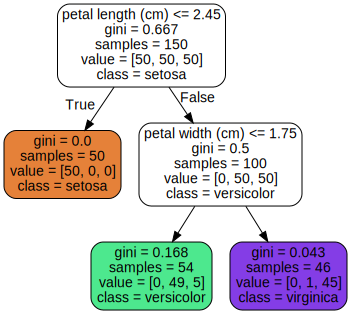

In [93]:
# 결정 트리로 iris 데이터 훈련

from graphviz import Source
from sklearn.tree import export_graphviz

dot = export_graphviz(
        tree_clf,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source(dot)

결정 트리로 iris데이터를 학습하면 위와 같이 꽃잎의 길이가 2.45cm보다 작은것은 모두 setosa로 분류 되고

길이가 2.45cm보다 긴 샘플 중에서 꽃잎의 너비가 1.75cm보다 작은 것은 약간의 불순도가 있지만 versicolor로 추정할 수 있다.

그리고 1.75보다 너비가 큰것은 virginica로 볼 수 있다.

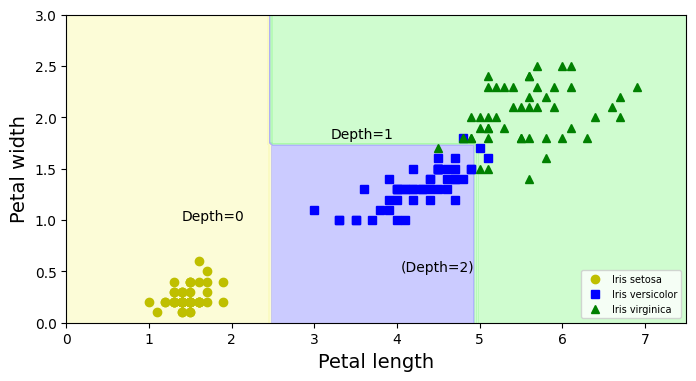

In [102]:
# 결정 트리 결정경계 시각화 - 깊이 2

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
    if iris:
        custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
        plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=7)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.text(1.40, 1.0, "Depth=0", fontsize=10)
plt.text(3.2, 1.80, "Depth=1", fontsize=10)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=10)
plt.show()

In [95]:
# iris 결정 트리 시각화 - 깊이 3

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

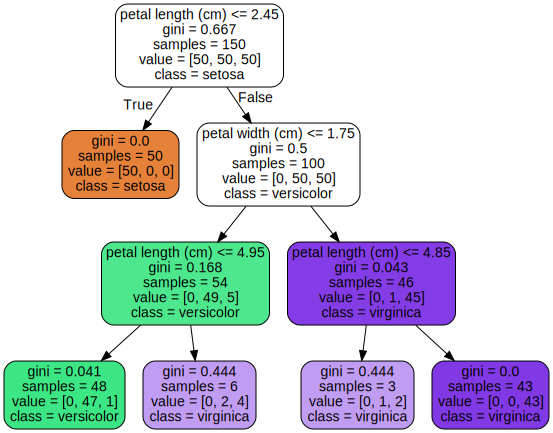

In [96]:
# 결정 트리로 iris 데이터 훈련

dot = export_graphviz(
        tree_clf,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source(dot)

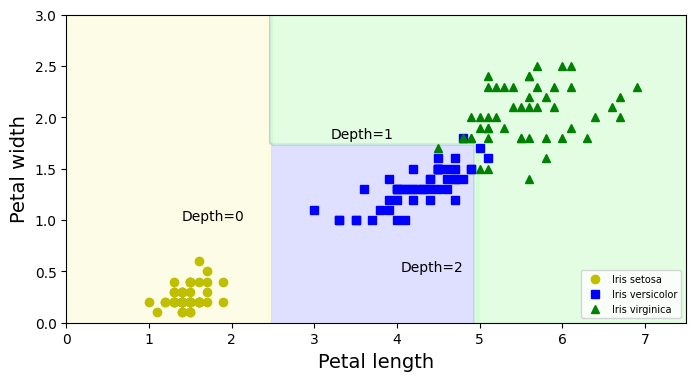

In [97]:
# 결정 트리 결정경계 시각화 - 깊이 3

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.text(1.40, 1.0, "Depth=0", fontsize=10)
plt.text(3.2, 1.80, "Depth=1", fontsize=10)
plt.text(4.05, 0.5, "Depth=2", fontsize=10)
plt.show()

위에서 구한 결정 트리에 의해 깊이가 2일때는 length가 2.45를 기준으로 한번, width가 1.75를 기준으로 또 한번 나눠지는 것을 볼 수 있다.

깊이를 3으로 늘린다면 위와 같이 length가 2.45를 기준으로 한번, width가 1.75이하 일때 length가4.95이하인 것과 length가4.95보다 큰것으로 두 번 나눠져 총 3개로 나눠지는것을 볼 수 있다.

In [98]:
# random_state차이에 따른 결정 트리 차이

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

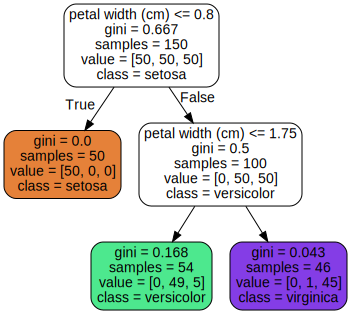

In [99]:
dot = export_graphviz(
        tree_clf_tweaked,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source(dot)

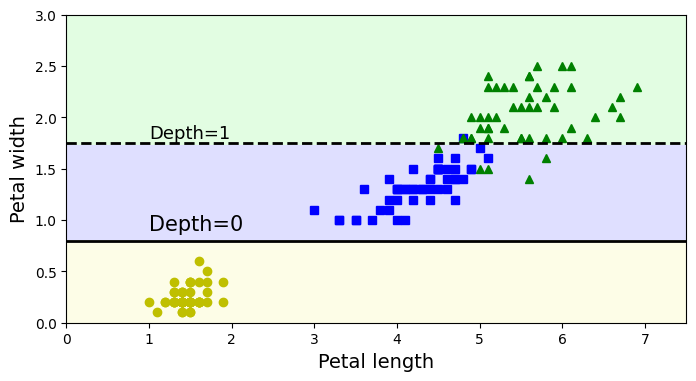

In [100]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.show()

결정 트리를 생성할 때 훈련 데이터의 작은 변화에도 값이 민감하게 변함으로 random_state가 달라지면 다른 결정트리가 생성이 된다.

위의 경우는 처음노드에서 잎의 길이로 분류하던것이 잎의 너비로 분류하는 것으로 바뀌어 최종적인 결정경계까지 바뀌게 되었다.

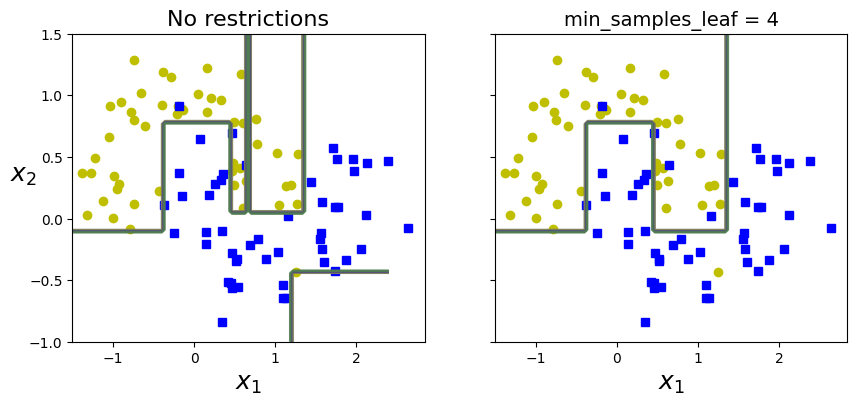

In [101]:
# min_samples_leaf을 사용하여 트리 규제

from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()

min_samples_leaf으로 규제를 하기 전에는 make_moons데이터의 노이즈에 민감하여 과대적합한 모습을 볼 수 있었다.

하지만 규제를 통해 리프 노드의 최소 샘플 수를 정해줘서 이상치에 해당하는 샘플의 영향을 줄여 일반화가 잘 된 모델로 예측에 성공한것을 볼 수 있다.

왜냐하면 결정트리는 계단 모양으로 결정 경계를 만들기 때문에 결정 트리는 데이터의 회전에 의해서도 결과값에 영향을 받는다.

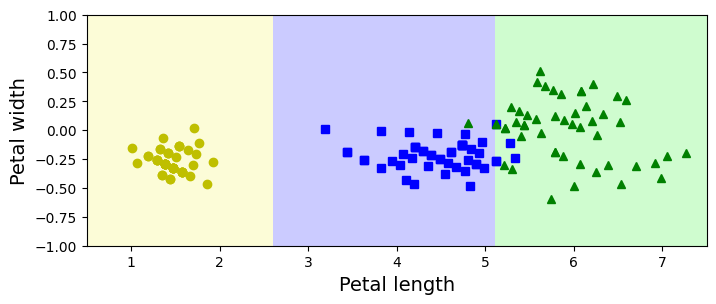

In [111]:
# iris데이터를 시계방향으로 20도 회전시킨 데이터로 학습

angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1])

plt.show()

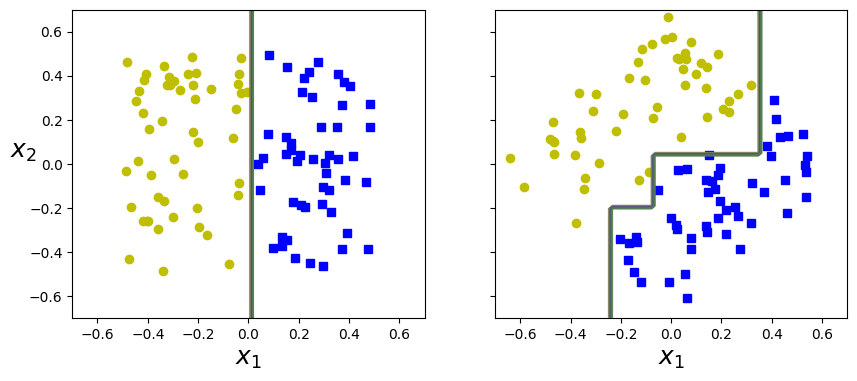

In [122]:
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32)

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")
plt.show()

위는 결정트리는 0 ~ 1 사이의 랜덤한 데이터 100개 생성후 양수와 음수인 샘플로 클래스를 구분한 것이다.

왼쪽은 샘플 그대로 결정 경계를 구해 보시한 것이고, 오른쪽은 데이터를 45도 회전한 다음 학습을 한 결과이다.

이러한 점으로 봐서 결정 경계는 데이터의 변화에 민감하게 작용하는 것을 볼 수 있다.

In [123]:
# 결정 트리를 사용해서 회귀 학습

m = 200
X = np.random.rand(m, 1) 
y = 4 * (X - 0.5) ** 2 + np.random.randn(m, 1) / 10  # y = 4(x - 0.5)^2에 노이즈 추가

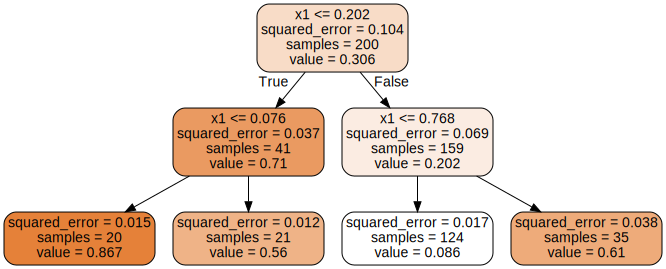

In [127]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)
tree = export_graphviz(
        tree_reg,
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source(tree)

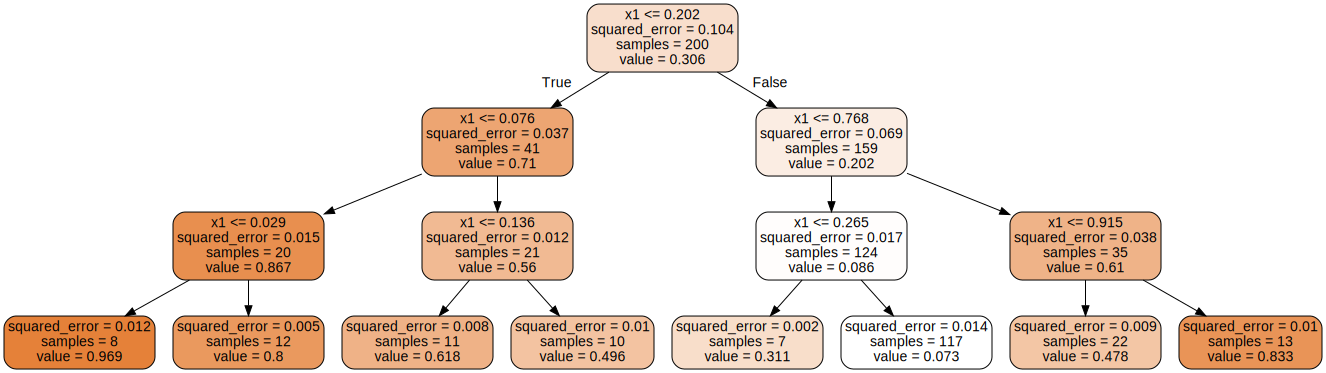

In [128]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)
tree = export_graphviz(
        tree_reg,
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source(tree)

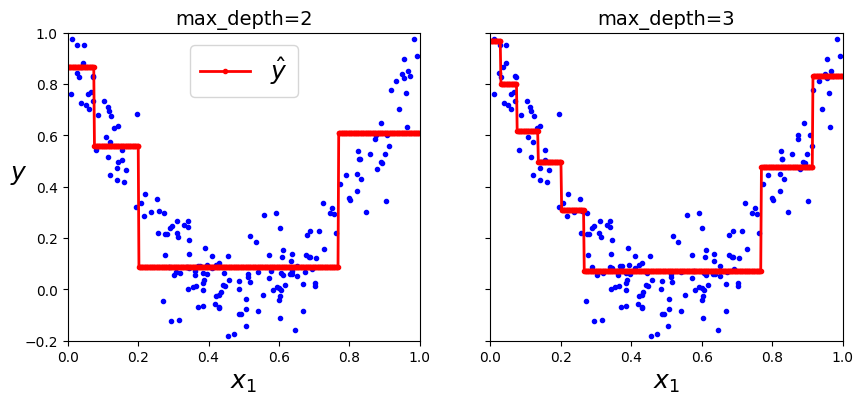

In [130]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("max_depth=3", fontsize=14)
plt.show()

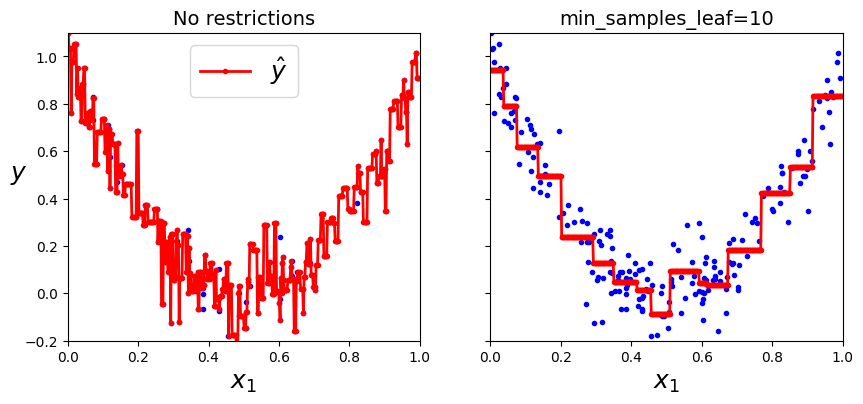

In [131]:
# 규제를 통한 과대적합된 회귀 일반화

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show()